In [29]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Helper functions

In [53]:
"""
> function to load data from path directory to a matrix.
> each row of the resulting matrix, corresponds to a flattened image
  in grayscale format
"""
def load_data(path, spc):
    path = path+str(spc)+'pc/'
    #total number of classes
    M = len(os.listdir(path))
    #dimensions of each image
    N = 200*180
    #matrix with features and labels
    data = np.empty((M*spc,N+1))
    #index of data matrix
    m = 0
    for i in range(1,M+1):
        tgt = path+str(i)+'/'
        pics = os.listdir(tgt)
        for pic in pics:
            #store each flattened image, as a row in data matrix
            data[m,0:-1] = cv.imread(tgt+pic, cv.IMREAD_GRAYSCALE).ravel()
            data[m,-1] = i
            m +=1
    #just to verify that orden doesn't affect results
    #np.random.shuffle(data)
    return (data[:,0:-1], data[:,-1])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(15,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
#load data
spc_tr = 2
spc_ts = 20-spc_tr
X_tr,y_tr = load_data('./db/train94/', spc_tr)
X_ts,y_ts = load_data('./db/test94/', spc_ts)

In [60]:
clf = LDA()

In [61]:
#solve it
clf.fit(X_tr, y_tr)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [62]:
y_pd = clf.predict(X_ts)

In [63]:
cm = confusion_matrix(y_ts, y_pd)

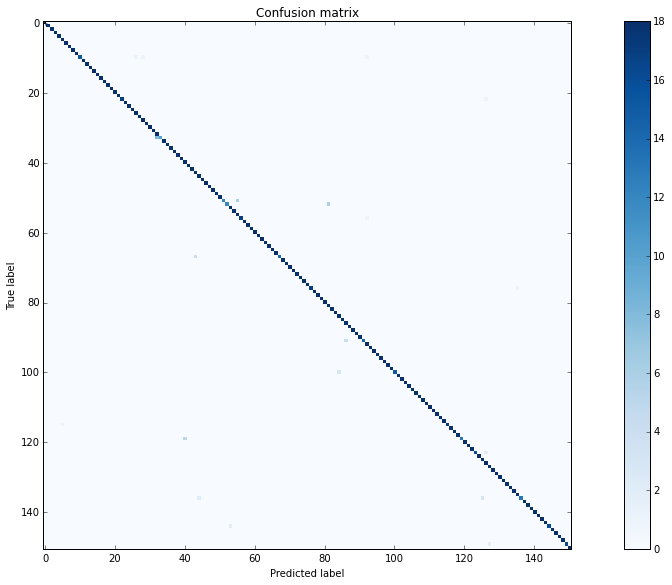

In [64]:
plot_confusion_matrix(cm)

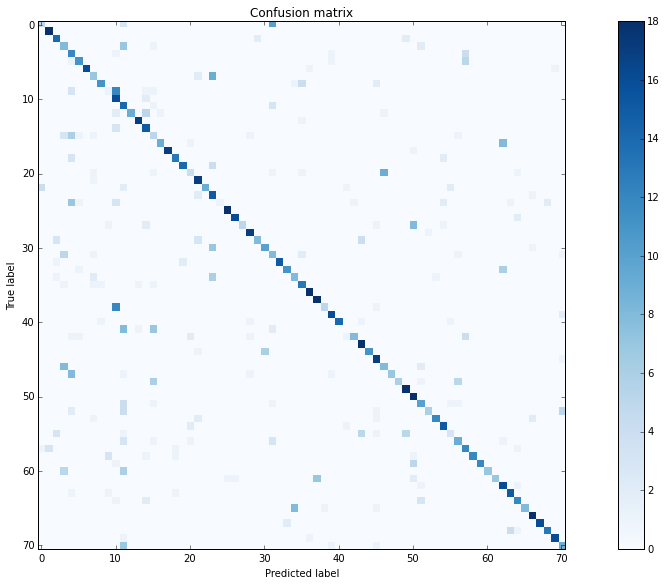

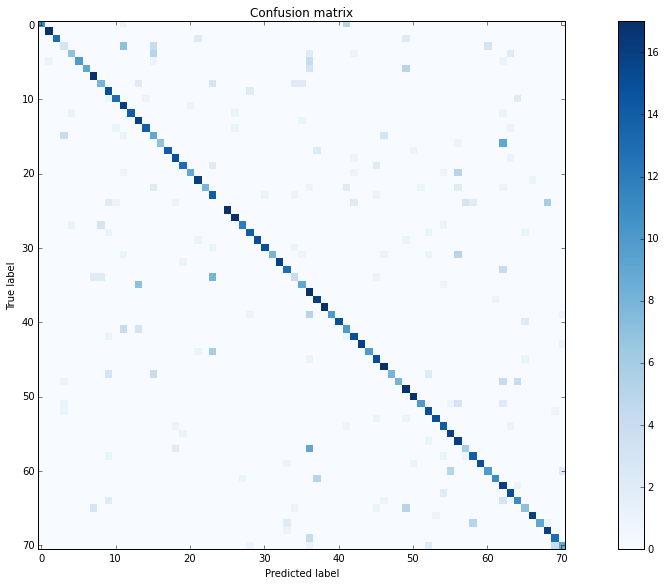

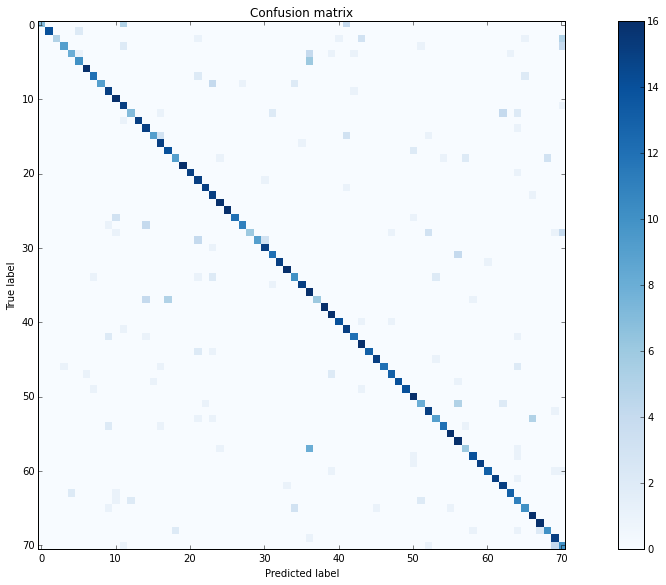

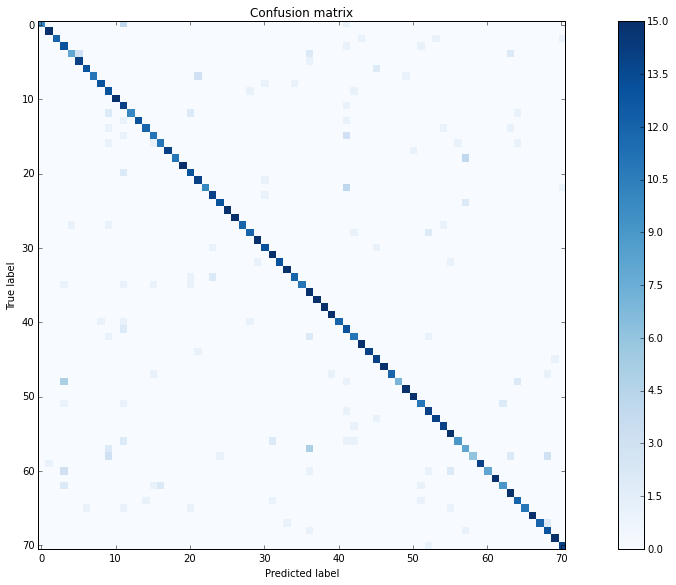

In [66]:
for i in range(2,6):
    spc_tr = i
    spc_ts = 20-spc_tr
    X_tr,y_tr = load_data('./db/train95/', spc_tr)
    X_ts,y_ts = load_data('./db/test95/', spc_ts)
    clf = LDA()
    clf.fit(X_tr, y_tr)
    y_pd = clf.predict(X_ts)
    cm = confusion_matrix(y_ts, y_pd)
    plot_confusion_matrix(cm)
    #releasing memory of big objects
    del X_tr, X_ts, clf, cm